# Top Spotify Song Data Exploration with Plotly Express

Plotly Express is the easy-to-use, high-level interface to Plotly, which operates on "tidy" data and produces easy-to-style figures

We will use Spotify dataset that can be downloaded from Kagle through this link https://www.kaggle.com/leonardopena/top-spotify-songs-from-20102019-by-year

## Step 1 - Install Plotly Library 

To install plotly please refer to this https://plot.ly/python/getting-started/

In [1]:
# Import Required Library
import pandas as pd
import numpy as np
import plotly.express as px

In [278]:
# Import Dataset
rawfile = './top10s.csv'

df = pd.read_csv(rawfile,encoding = "ISO-8859-1") #use encoder to avoid utf-8 error
df = df.iloc[:,1:15] #remove id column
df = df.loc[df['year']>=2015] # get 5 year data only

display(df.head())
print('Data frame shape: {}'.format(df.shape))

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
268,Thinking out Loud,Ed Sheeran,pop,2015,79,45,78,-6,18,59,282,47,3,84
269,I'm Not The Only One,Sam Smith,pop,2015,82,49,68,-6,8,49,239,53,4,84
270,The Hills,The Weeknd,canadian contemporary r&b,2015,113,56,58,-7,14,14,242,7,5,84
271,Love Yourself,Justin Bieber,canadian pop,2015,100,38,61,-10,28,52,234,84,44,83
272,Uptown Funk,Mark Ronson,dance pop,2015,115,61,86,-7,3,93,270,1,8,82


Data frame shape: (335, 14)


## Step 2 - Lets Visualize

Lets explore the dataset using plotly express library

#### What is the top 5 genre?

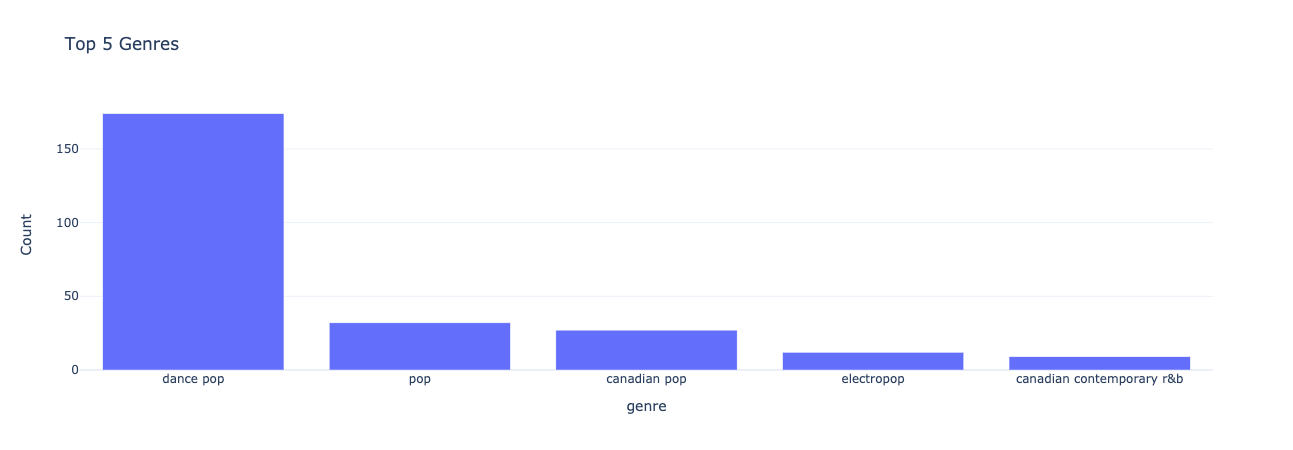

In [221]:
# Prepare data
famous_genres = df['top genre'].value_counts().head(5).to_frame().reset_index()
famous_genres.columns = ['genre','Count']
famous_genres_list = list(famous_genres['genre'])

# Visualize
px.bar(famous_genres, 
       x = 'genre', 
       y = 'Count', 
       title = 'Top 5 Genres',
       template = 'plotly_white')

#### Who is our top 5 artist?

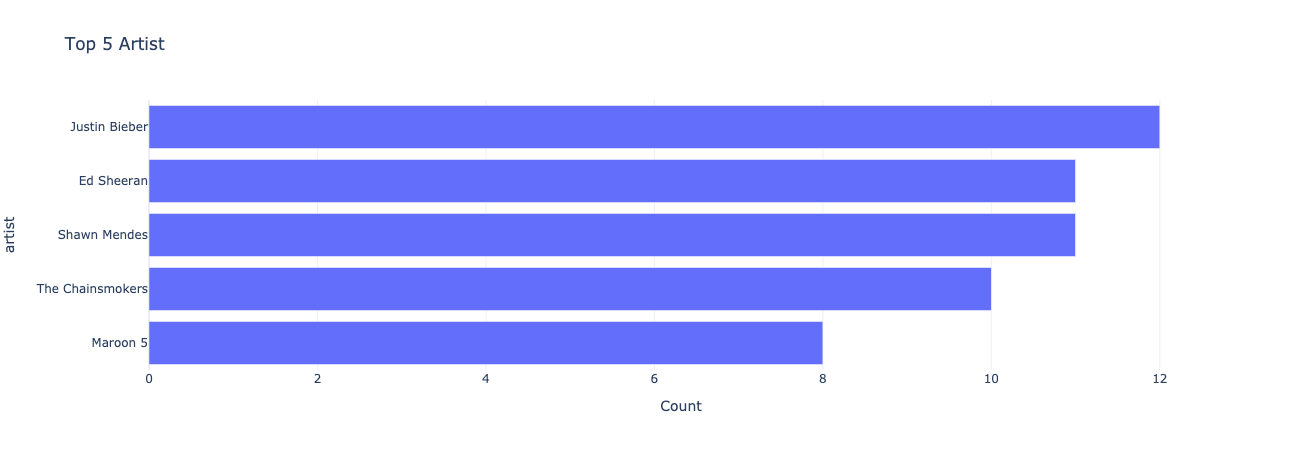

In [291]:
# Prepare data
famous_artist = df['artist'].value_counts().head(5).to_frame().reset_index()
famous_artist.columns = ['artist','Count']
famous_artist_list = list(famous_artist['artist'])

# Visualize
px.bar(famous_artist.sort_values('Count'), 
       x = 'Count', 
       y = 'artist', 
       title = 'Top 5 Artist',
       template = 'plotly_white',
       orientation = 'h')

#### How is Historical Average Genre Popularity Since 201 till 2019?

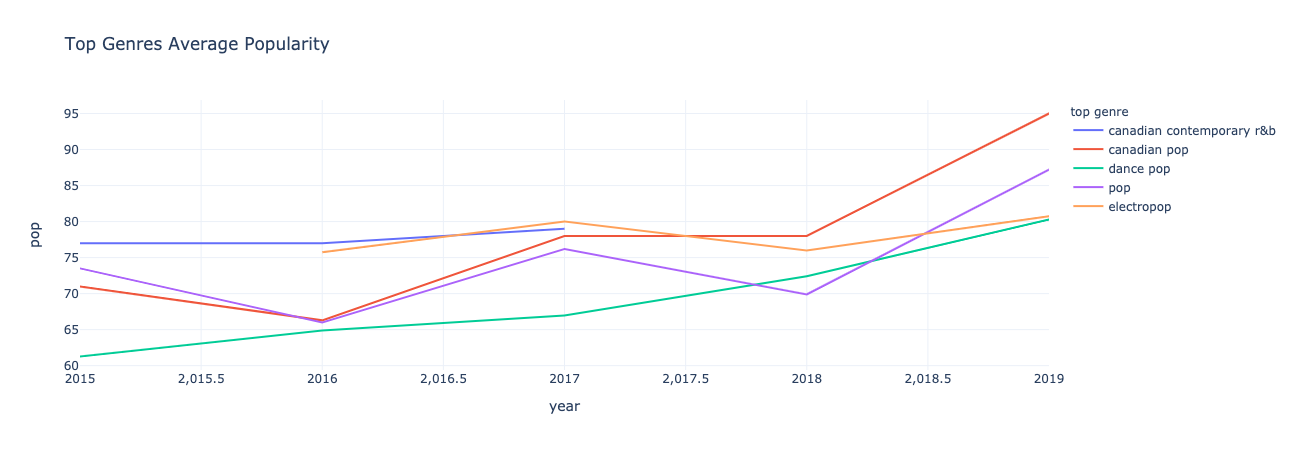

In [261]:
# Average Popularity of a particular genre over the years

top_5_genre = famous_genres_list
df_top = df.loc[df['top genre'].isin(top_5_genre)]

group_by_genre = df_top.groupby(["year","top genre"]).mean().sort_values('year').reset_index()

px.line(group_by_genre,
        x = 'year',
        y ='pop',
        line_group = 'top genre',
        title = 'Top Genres Average Popularity',
        template = 'plotly_white',
        color = 'top genre'
        )

### How is the distribution of song popularity by those top 5 artist?

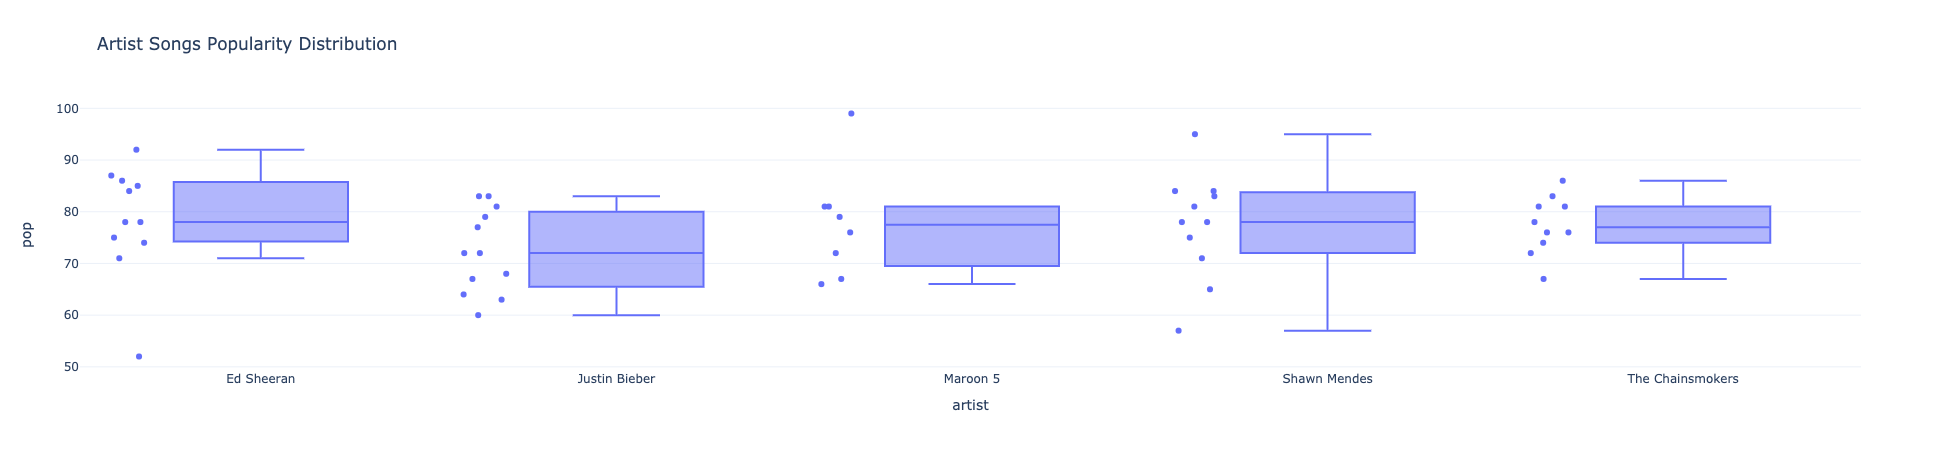

In [308]:
### Average Popularity of a particular genre over the years

top_5_artist = famous_artist_list
df_top_artist = df.loc[df['artist'].isin(top_5_artist)]

px.box(df_top_artist,
       x = 'artist',
       y = 'pop',
       hover_name = 'title',
       title = 'Artist Songs Popularity Distribution',
       template = 'plotly_white',
       points = 'all')

#### How was the dance pop genre popularity distributed in the last 5 years?

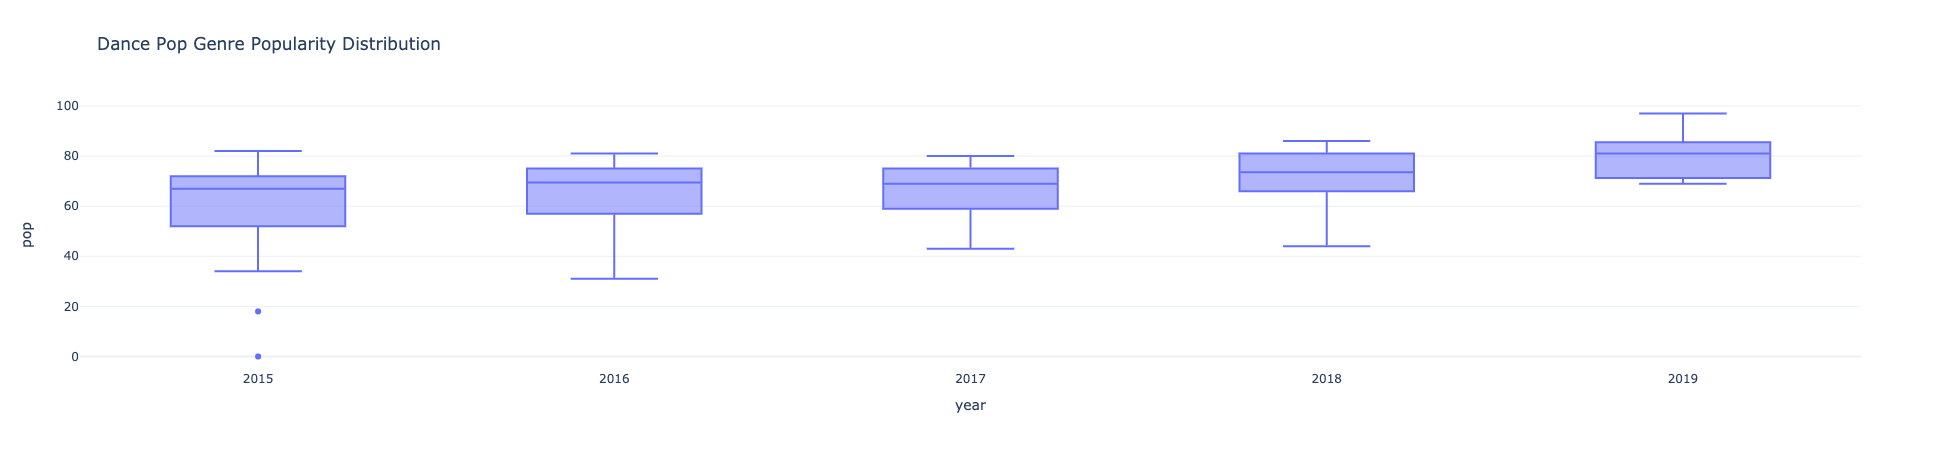

In [309]:
# Prepare Data
df_dance_pop = df_top.loc[(df_top['top genre']== 'dance pop')]

px.box(df_dance_pop,
       x = 'year',
       y = 'pop',
       title = 'Dance Pop Genre Popularity Distribution',
       template = 'plotly_white')

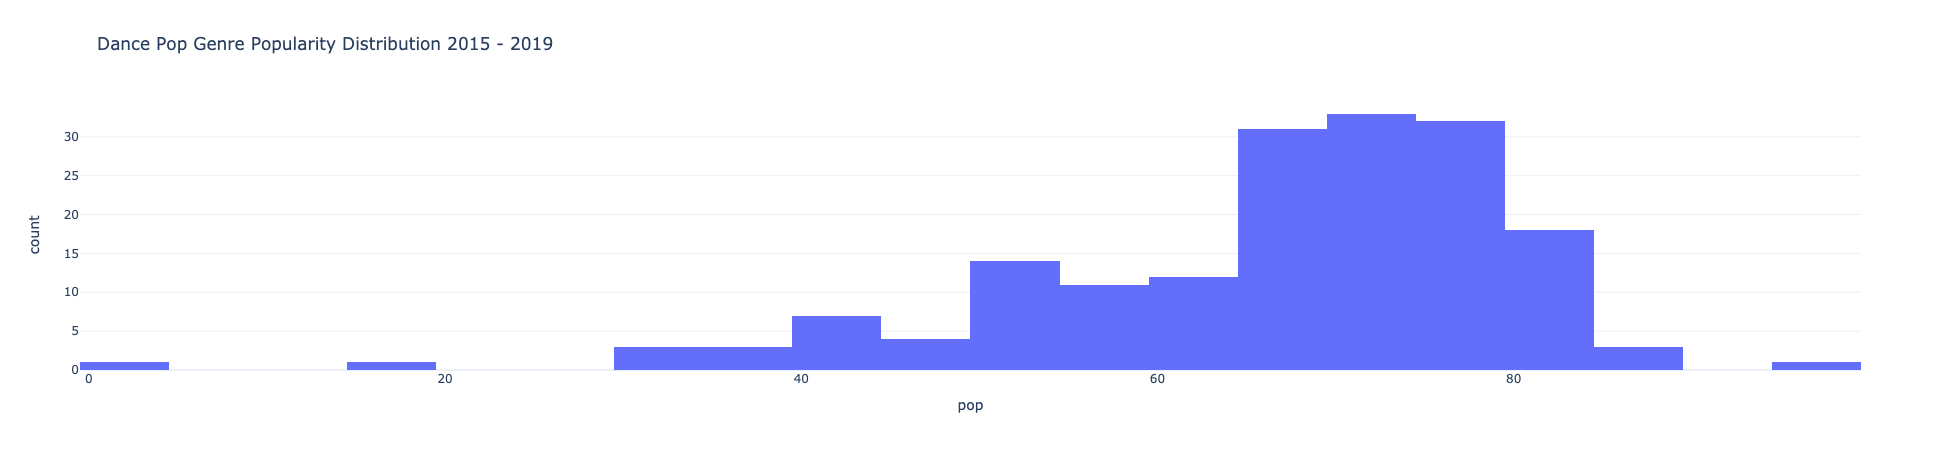

In [310]:
px.histogram(df_dance_pop, x = 'pop', 
             title = 'Dance Pop Genre Popularity Distribution 2015 - 2019',
             template = 'plotly_white')

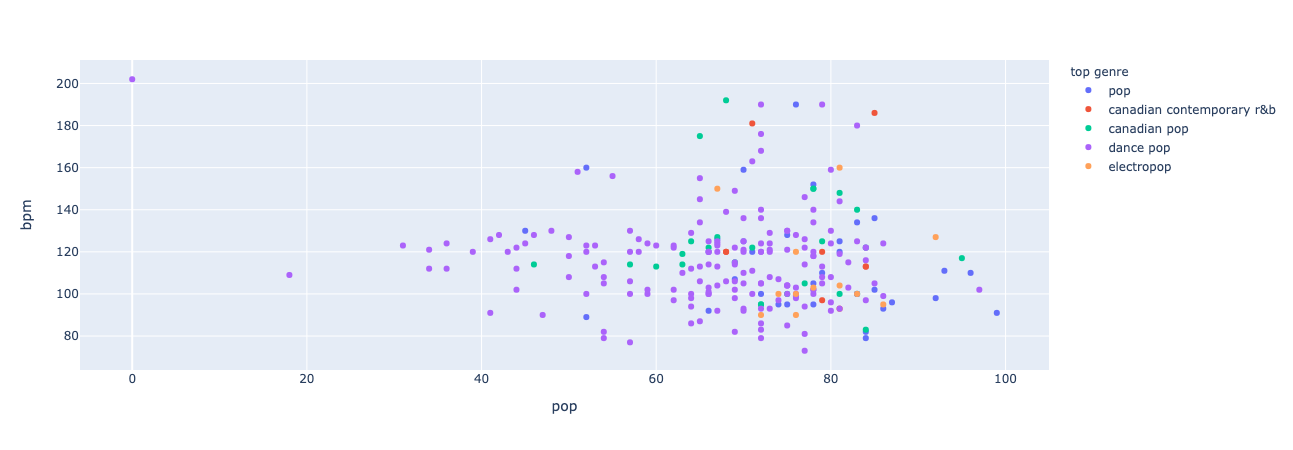

In [302]:
px.scatter(df_top,
           x = 'pop',
           y = 'bpm',
           color = 'top genre',
)

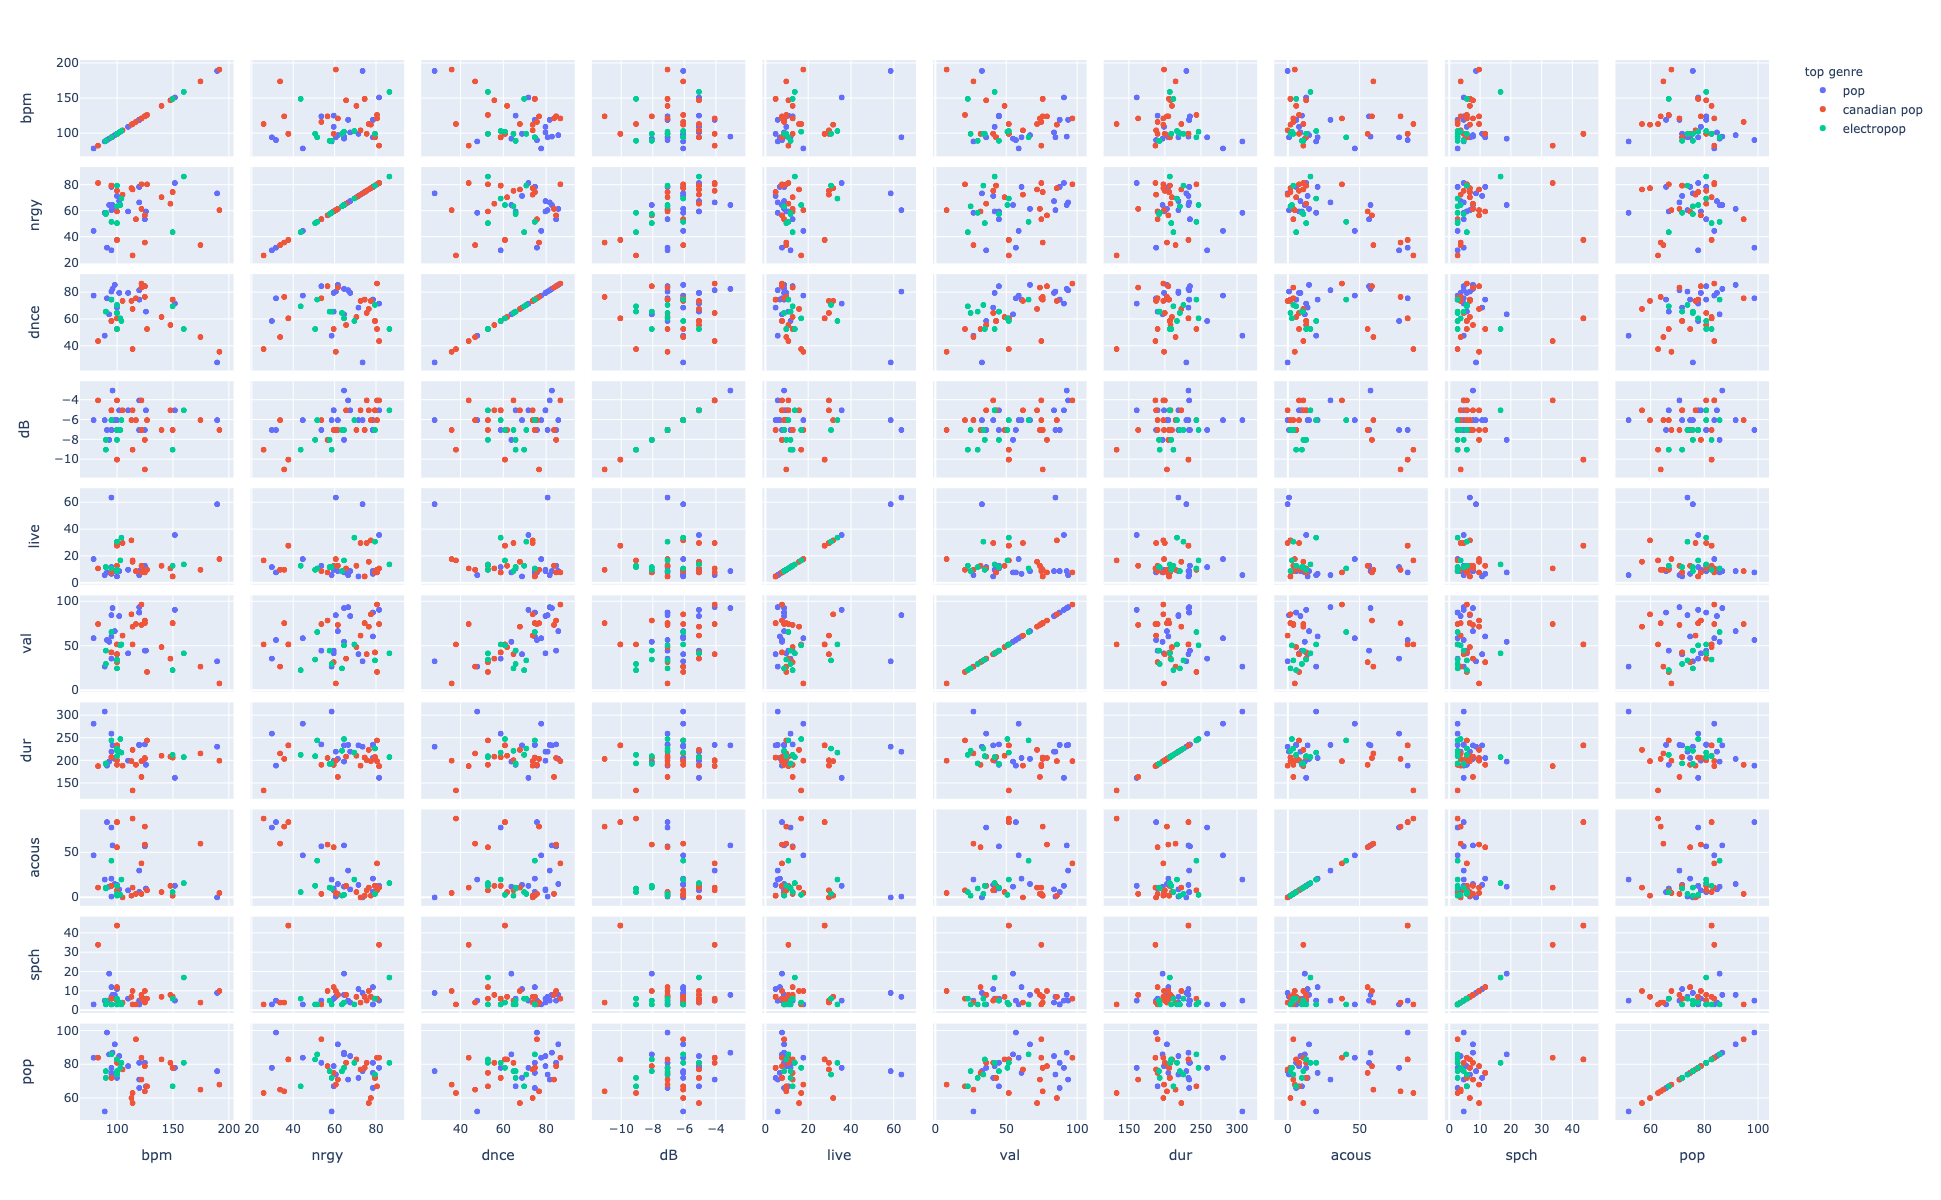

In [307]:
cols = df_top_artist.select_dtypes(include=['float', 'int']).columns.tolist()[1:]
px.scatter_matrix(df_top_artist, dimensions = cols,width=1400 ,height=1200, color = df_top_artist['top genre'])
